<h1 align = "center">EE 325 Digital Signal Processing</h1>
<h2 align = "center">Laboratory Assignment 2</h2>
<h3 align = "center"> E/19/445 </h3>


In [78]:
import numpy as np
import math
import sympy as sp
from sympy import latex
from scipy.signal import butter, freqs, TransferFunction, group_delay, impulse, cheby1, cheby2, filtfilt, buttord, cheb1ord, cheb2ord
import matplotlib.pyplot as plt

In [22]:
x, y, a, b, c = 1, 9, 4, 4, 5

d = a + b + c

if d >= 10:
    d1 = int(str(d)[0])
    d2 = int(str(d)[1])
    d = d1*d2

w_p = 100 + np.sqrt(1.1*a + 11*b + 101*c)
w_s = w_p*(1+np.sqrt(d/10))

delta_s = 0.1
delta_p = 0.9
delta_t = 0.1

## Butterworth Filter Order

In [52]:
analog_w_p = np.tan(w_p*180/(2*np.pi))
analog_w_s = np.tan(w_s*180/(2*np.pi))

butterworth_order = buttord(analog_w_p, analog_w_s, delta_s, delta_p, analog=True)[0]
print(f"Butterworth order: {butterworth_order}")

Butterworth order: 3


## Chebyshev Type I Order

In [53]:
cheby1_order = cheb1ord(analog_w_p, analog_w_s, delta_s, delta_p, analog=True)[0]
print(f"Chebyshev Type I order: {cheby1_order}") 

Chebyshev Type I order: 2


## Chebyshev Type II Order

In [54]:
cheby2_order = cheb2ord(analog_w_p, analog_w_s, delta_s, delta_p, analog=True)[0]
print(f"Chebyshev Type II order: {cheby2_order}")

Chebyshev Type II order: 2


## Butterworth Filter

In [68]:
critical_freq = (analog_w_p)/(1/delta_p**2 - 1)**(2/butterworth_order)

s = sp.symbols('s')

b, a = butter(butterworth_order, critical_freq, 'low', analog=True)

tf = TransferFunction(b, a)

numerator = 0
for i in range(len(b)-1,-1,-1):
    numerator += b[i]*s**i

denominator = 0
for i in range(len(a)-1,-1,-1):
    denominator += a[i]*s**i

tf = numerator/denominator

# print(latex(tf))

z = sp.symbols('z')

transform = (1-z)/(1+z)
tf = tf.subs(s, transform)
# print(latex(tf))

<h1 align = "center"> Butterworth Filter Properties </h1>

Transfer Function of the Butterworth Filter
\begin{align}
=\frac{690.36995054605}{690.36995054605 s^{3} + 156.225257379612 s^{2} + 17.6762698202767 s + 1.0}
\end{align}
Thus the Transfer function in discrete domain
\begin{align}
=\frac{690.36995054605}{\frac{690.36995054605 \left(1 - z\right)^{3}}{\left(z + 1\right)^{3}} + \frac{156.225257379612 \left(1 - z\right)^{2}}{\left(z + 1\right)^{2}} + \frac{17.6762698202767 \cdot \left(1 - z\right)}{z + 1} + 1.0}
\end{align}

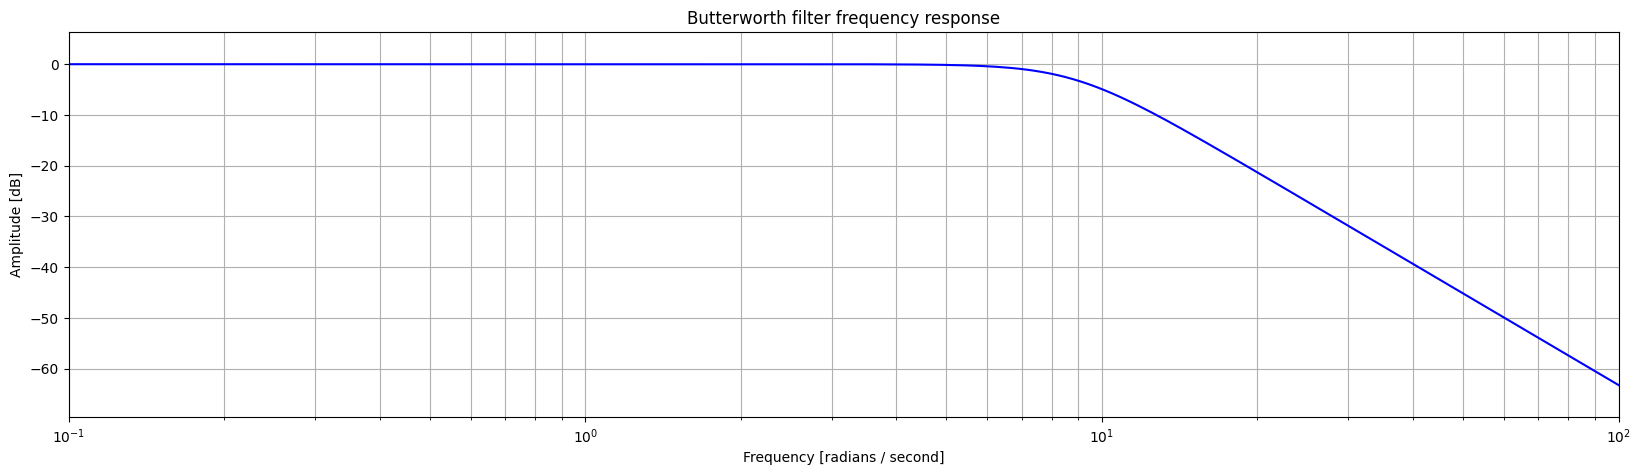

In [64]:
w, mag = freqs(b, a) #type ignore
plt.figure(figsize=(20, 5))
plt.semilogx(w, 20 * np.log10(mag), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

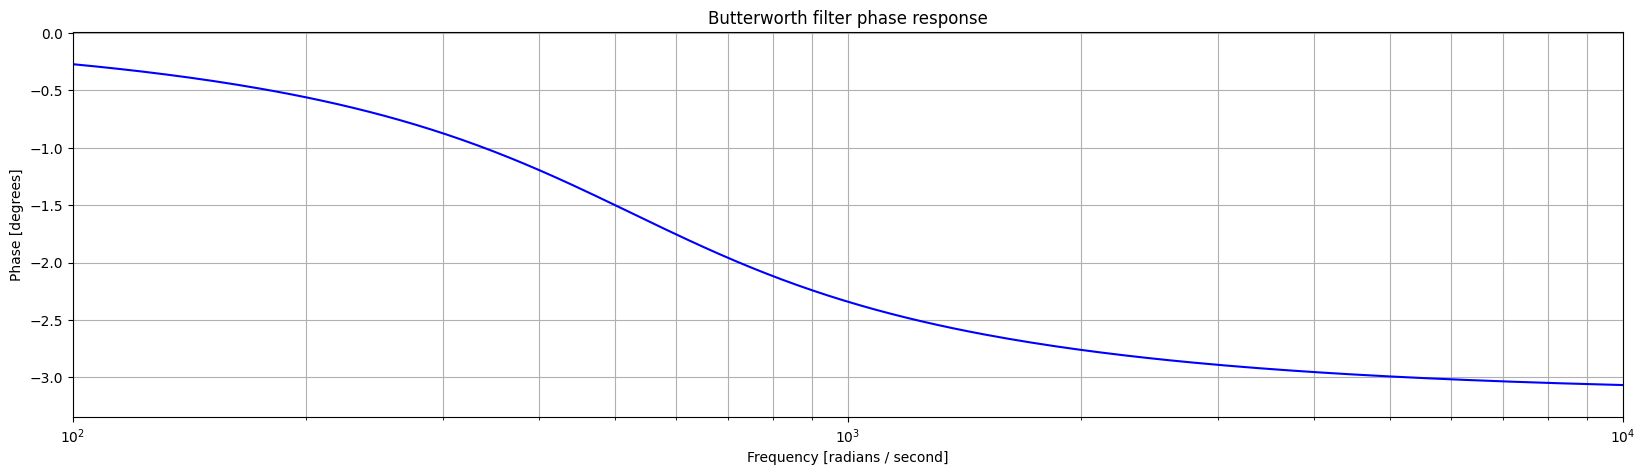

In [28]:
plt.figure(figsize=(20, 5))
plt.semilogx(w, np.angle(mag), 'b')
plt.title('Butterworth filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

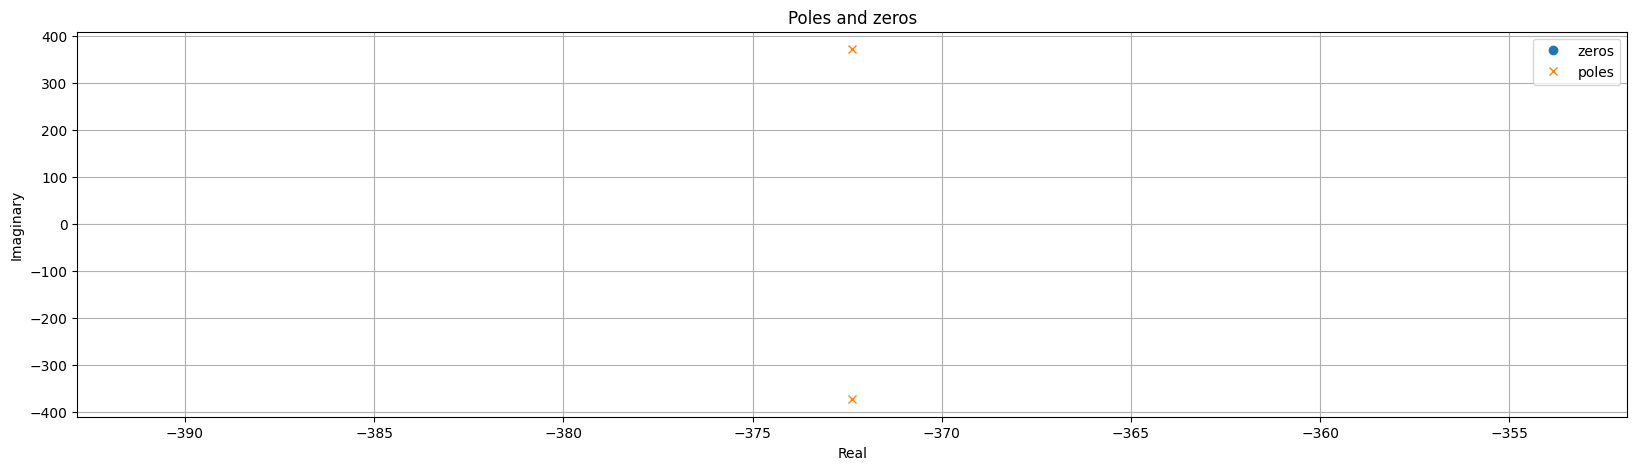

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(tf.zeros.real, tf.zeros.imag, 'o', label='zeros')
plt.plot(tf.poles.real, tf.poles.imag, 'x', label='poles')
plt.title('Poles and zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()

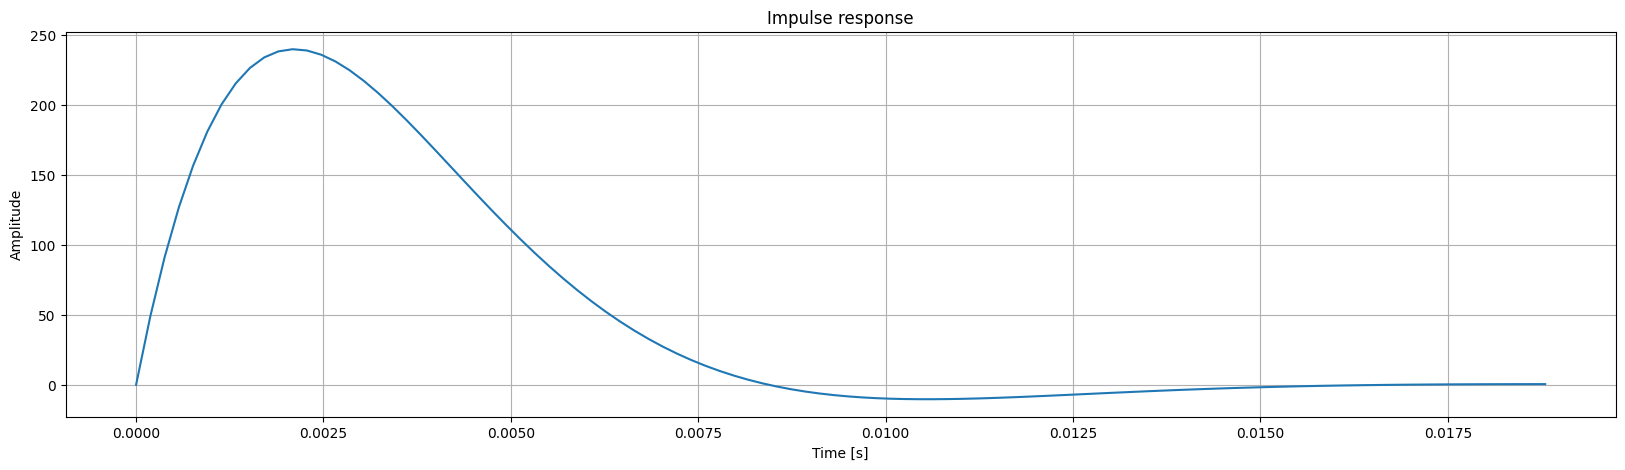

In [30]:
plt.figure(figsize=(20, 5))
t, h = impulse(tf)
plt.plot(t, h)
plt.title('Impulse response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

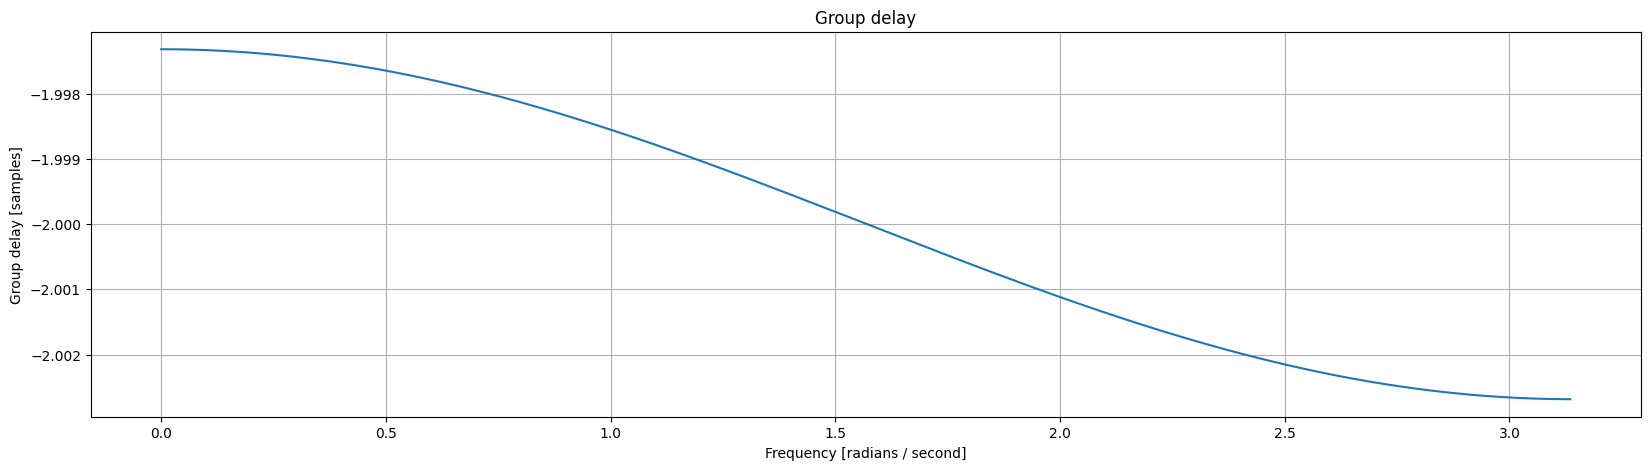

In [31]:
w, gd = group_delay((b, a))
plt.figure(figsize=(20, 5))
plt.plot(w, gd)
plt.title('Group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [samples]')
plt.grid()
plt.show()

## Chebyshev I Filter

In [70]:
cheby1_critical_freq = analog_w_p

b,a = cheby1(cheby1_order, 1, cheby1_critical_freq, 'low', analog=True)

tf = TransferFunction(b, a)

numerator = 0
for i in range(len(b)-1,-1,-1):
    numerator += b[i]*s**i

denominator = 0
for i in range(len(a)-1,-1,-1):
    denominator += a[i]*s**i

tf = numerator/denominator
# print(latex(tf))

tf = tf.subs(s, transform)
# print(latex(tf))

<h1 align = "center" >Chebyshev I Properties </h1>

Analog Domain Tranfer Function
\begin{align}
=\frac{11.1035545142627}{12.4583930733506 s^{2} + 3.69008973222545 s + 1.0}
\end{align}
Thus, Discrete Domain Transfer Function
\begin{align}
=\frac{11.1035545142627}{\frac{12.4583930733506 \left(1 - z\right)^{2}}{\left(z + 1\right)^{2}} + \frac{3.69008973222545 \cdot \left(1 - z\right)}{z + 1} + 1.0}
\end{align}

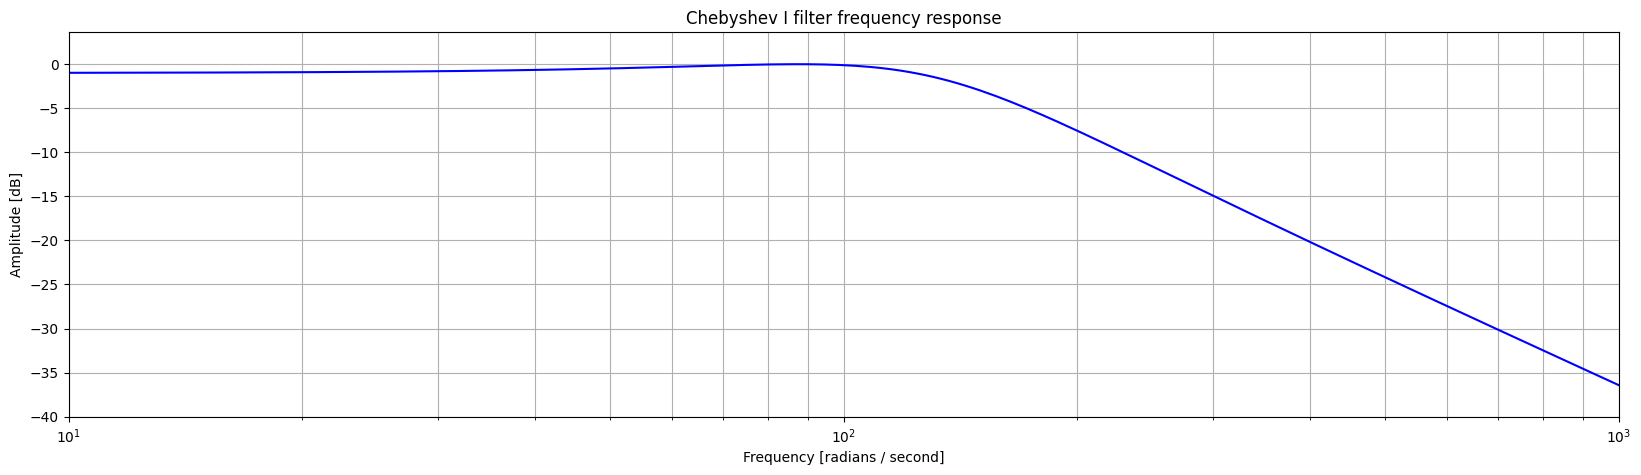

In [33]:
w, mag = freqs(b, a)
plt.figure(figsize=(20, 5))
plt.semilogx(w, 20 * np.log10(mag), 'b')
plt.title('Chebyshev I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

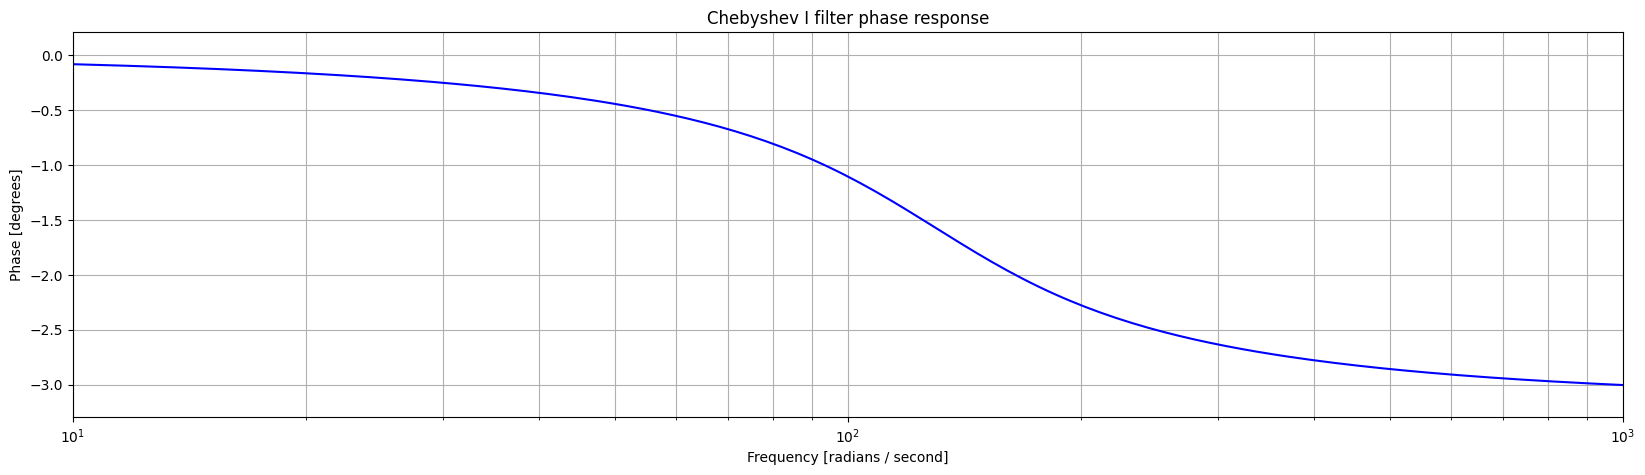

In [34]:
plt.figure(figsize=(20, 5))
plt.semilogx(w, np.angle(mag), 'b')
plt.title('Chebyshev I filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

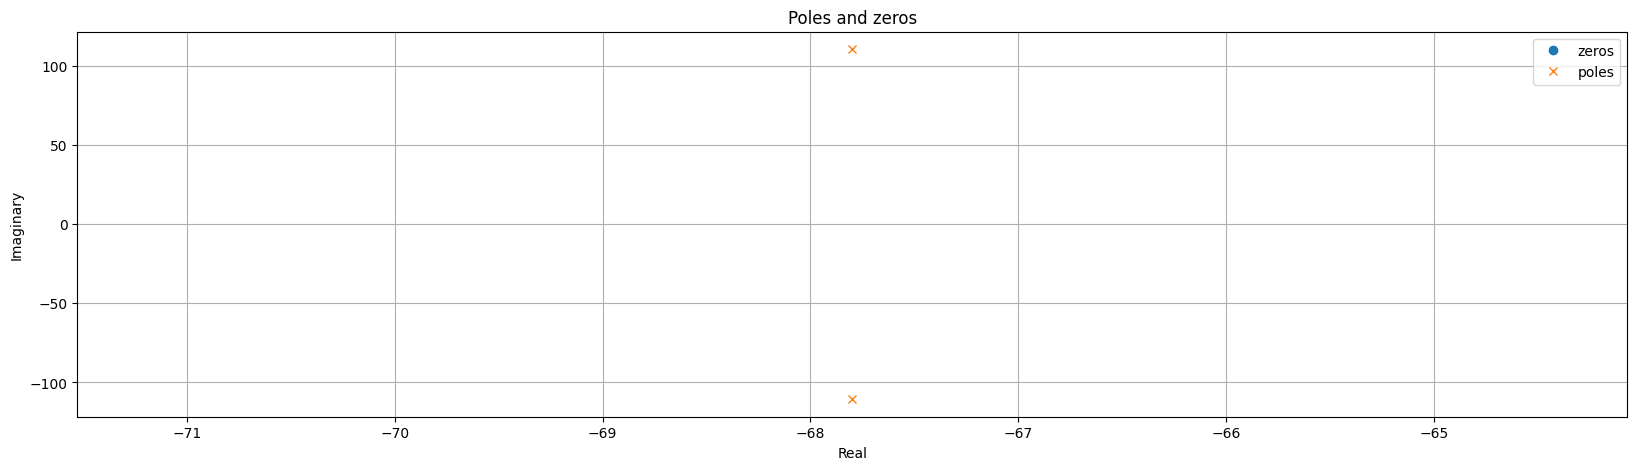

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(tf.zeros.real, tf.zeros.imag, 'o', label='zeros')
plt.plot(tf.poles.real, tf.poles.imag, 'x', label='poles')
plt.title('Poles and zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()

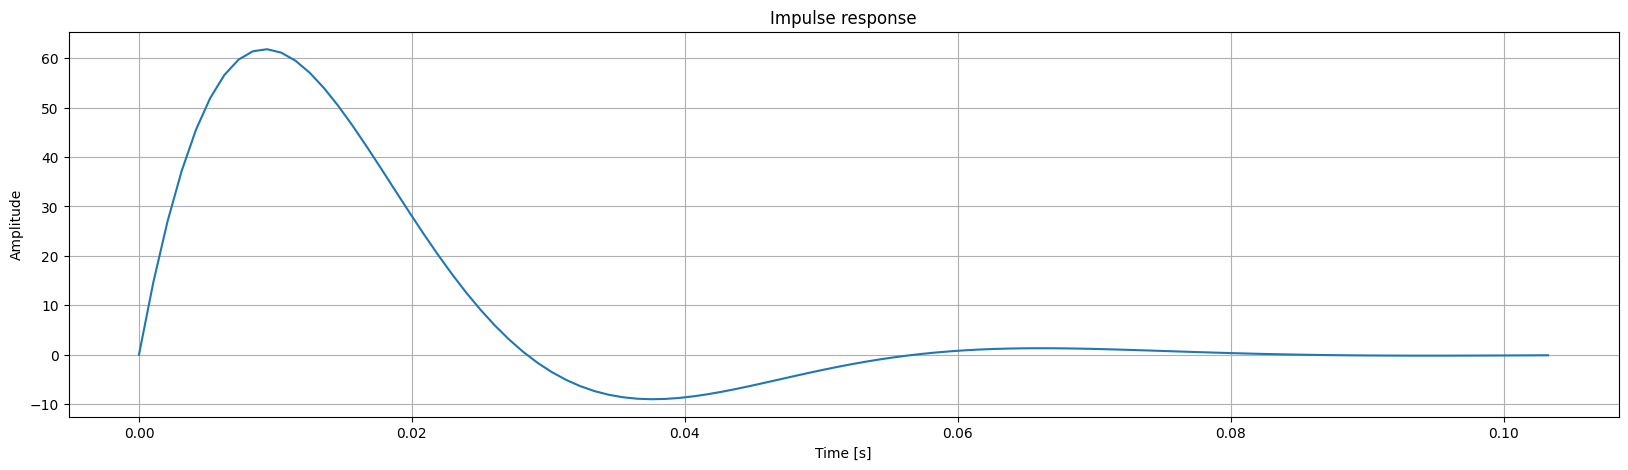

In [36]:
t, h = impulse(tf)
plt.figure(figsize=(20, 5))
plt.plot(t, h)
plt.title('Impulse response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

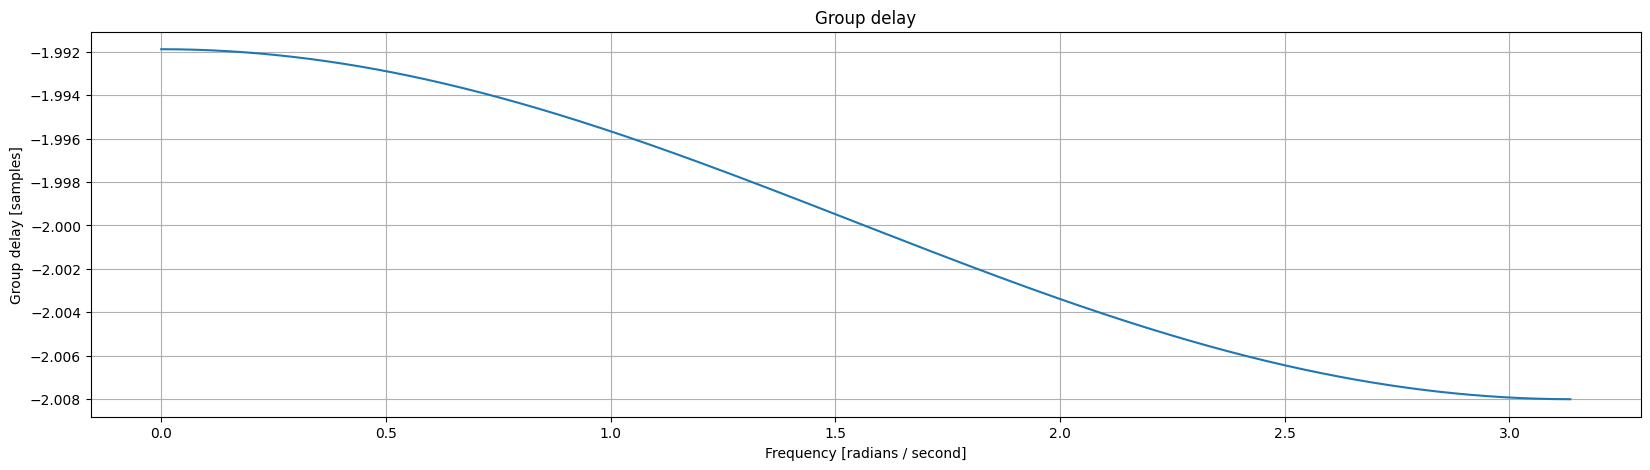

In [37]:
w, gd = group_delay((b, a))
plt.figure(figsize=(20, 5))
plt.plot(w, gd)
plt.title('Group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [samples]')
plt.grid()
plt.show()

# Chebyshev II Filter

In [72]:
cheby2_critical_freq = analog_w_s

b,a = cheby2(cheby2_order, 1, cheby2_critical_freq, 'low', analog=True)

tf = TransferFunction(b, a)

numerator = 0
for i in range(len(b)-1,-1,-1):
    numerator += b[i]*s**i

denominator = 0
for i in range(len(a)-1,-1,-1):
    denominator += a[i]*s**i

tf = numerator/denominator
# print(latex(tf))

tf = tf.subs(s, transform)
# print(latex(tf))



<h1>Chebyshev Type II Properties </h2>

Analog Domain Transfer Function
\begin{align}
=\frac{9.04490702776034 s^{2} + 0.891250938133745}{9.04490702776034 s^{2} + 1.40258700545558 s + 1.0}
\end{align}
Discrete Domain Transfer Function
\begin{align}
=\frac{\frac{9.04490702776034 \left(1 - z\right)^{2}}{\left(z + 1\right)^{2}} + 0.891250938133745}{\frac{9.04490702776034 \left(1 - z\right)^{2}}{\left(z + 1\right)^{2}} + \frac{1.40258700545558 \cdot \left(1 - z\right)}{z + 1} + 1.0}
\end{align}

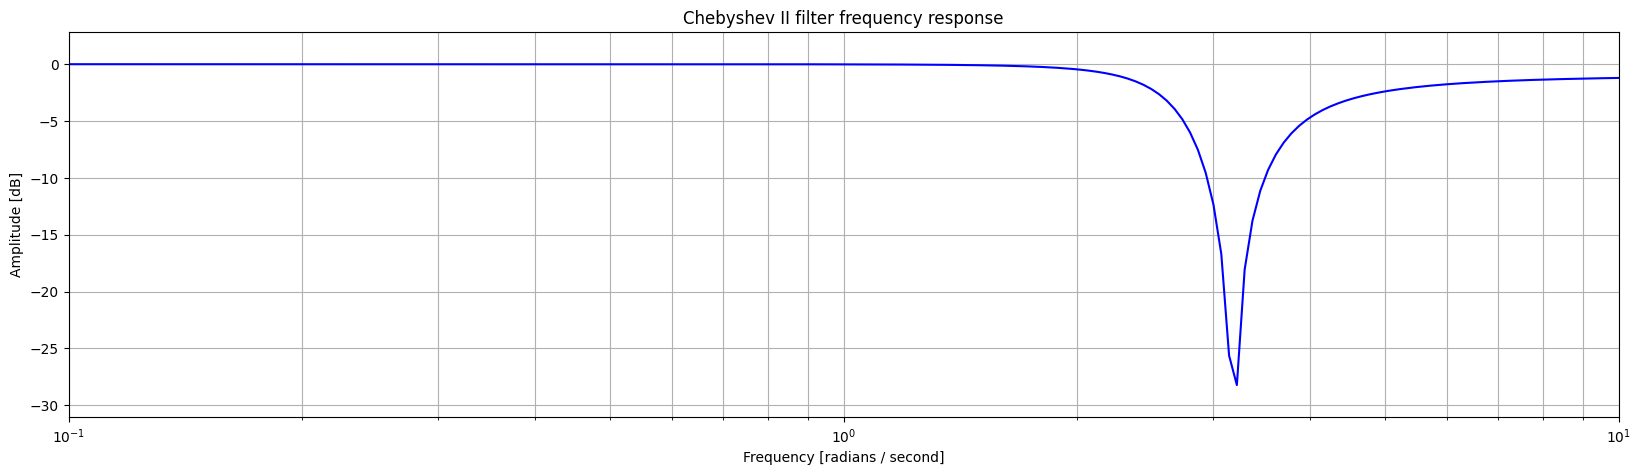

In [74]:
w, mag = freqs(b, a) #type ignore
plt.figure(figsize=(20, 5))
plt.semilogx(w, 20 * np.log10(mag), 'b')
plt.title('Chebyshev II filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

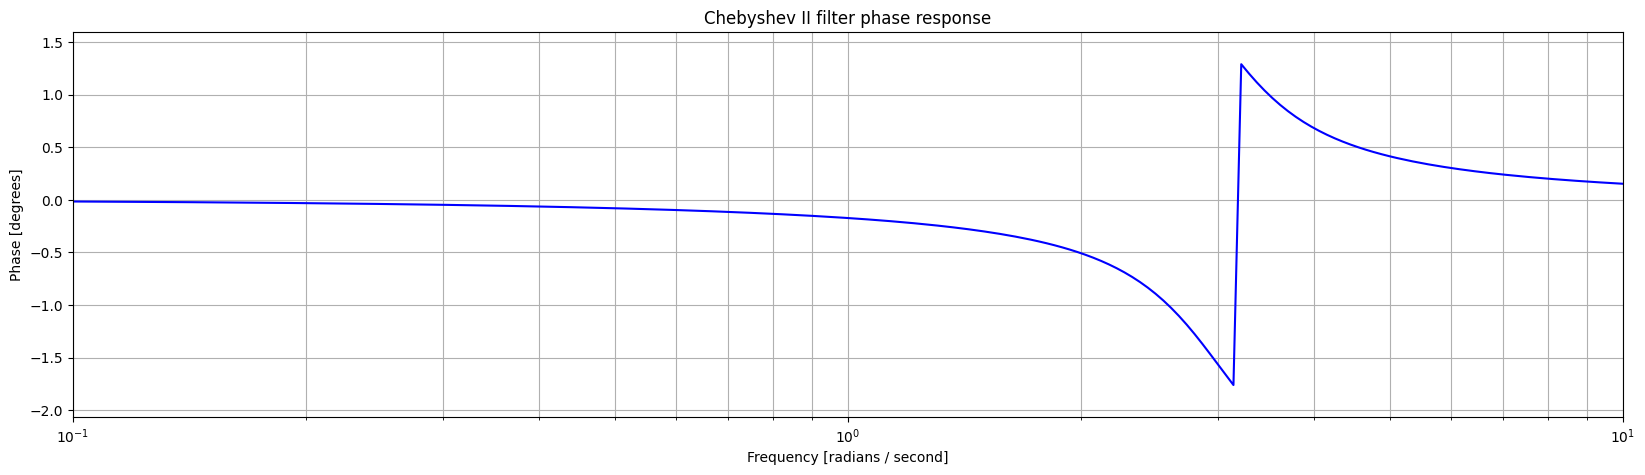

In [75]:
plt.figure(figsize=(20, 5))
plt.semilogx(w, np.angle(mag), 'b')
plt.title('Chebyshev II filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

# Question 4

In [88]:
np.random.seed(0)
num_samples = 1000
noise = np.random.normal(0, 1, num_samples)

fs = 1000
cutoff_freq = analog_w_s
b, a = butter(butterworth_order, critical_freq, 'low', fs=fs)

filtered_output = filtfilt(b, a, noise)

dft = np.fft.fft(filtered_output)
freq = np.fft.fftfreq(len(filtered_output), d=1/fs)


In [87]:
def plot_all(filtered_output, dft, freq, fs):
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 1, 1)
    plt.plot(filtered_output)
    plt.title('Output Signal')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')

    # DFT spectrum
    plt.subplot(3, 1, 2)
    plt.plot(freq, np.abs(dft))
    plt.title('DFT Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')

    # Power spectrum
    plt.subplot(3, 1, 3)
    plt.psd(filtered_output, Fs=fs)
    plt.title('Power Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (dB/Hz)')

    plt.tight_layout()
    plt.show()

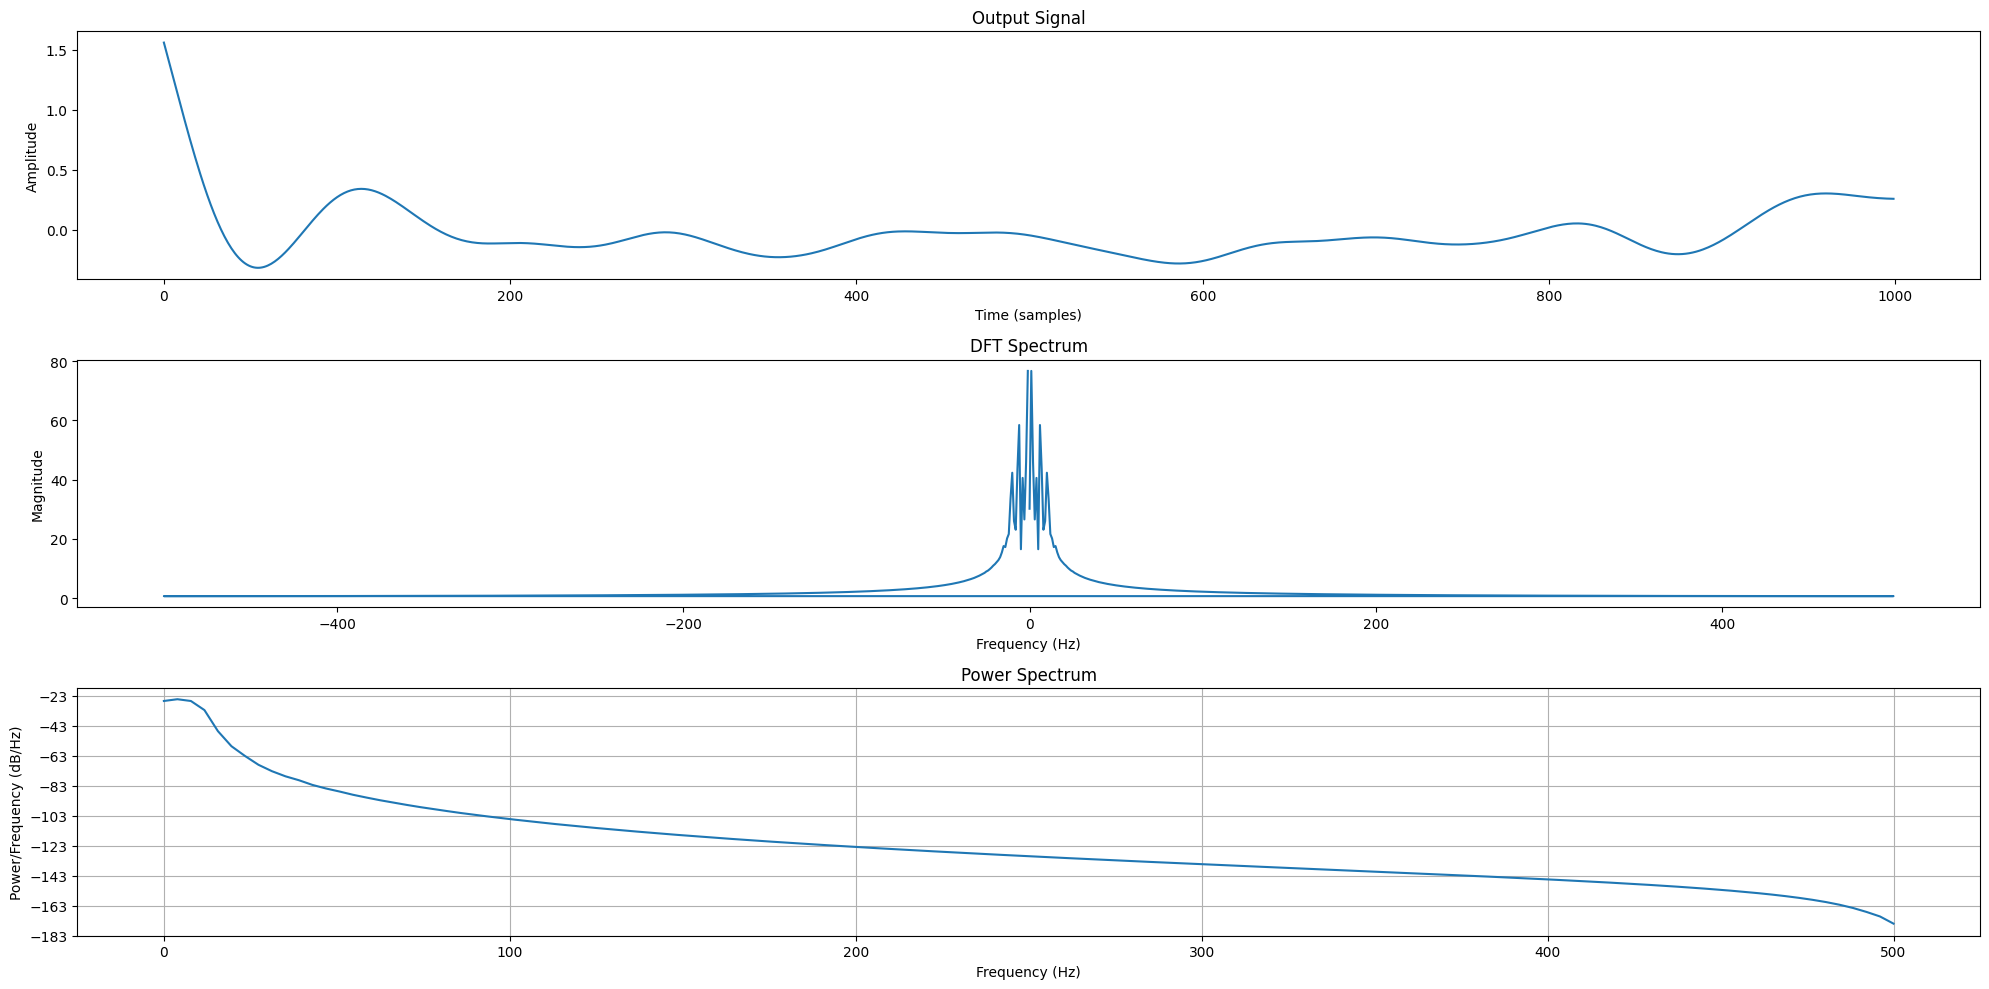

In [89]:
plot_all(filtered_output, dft, freq, fs)

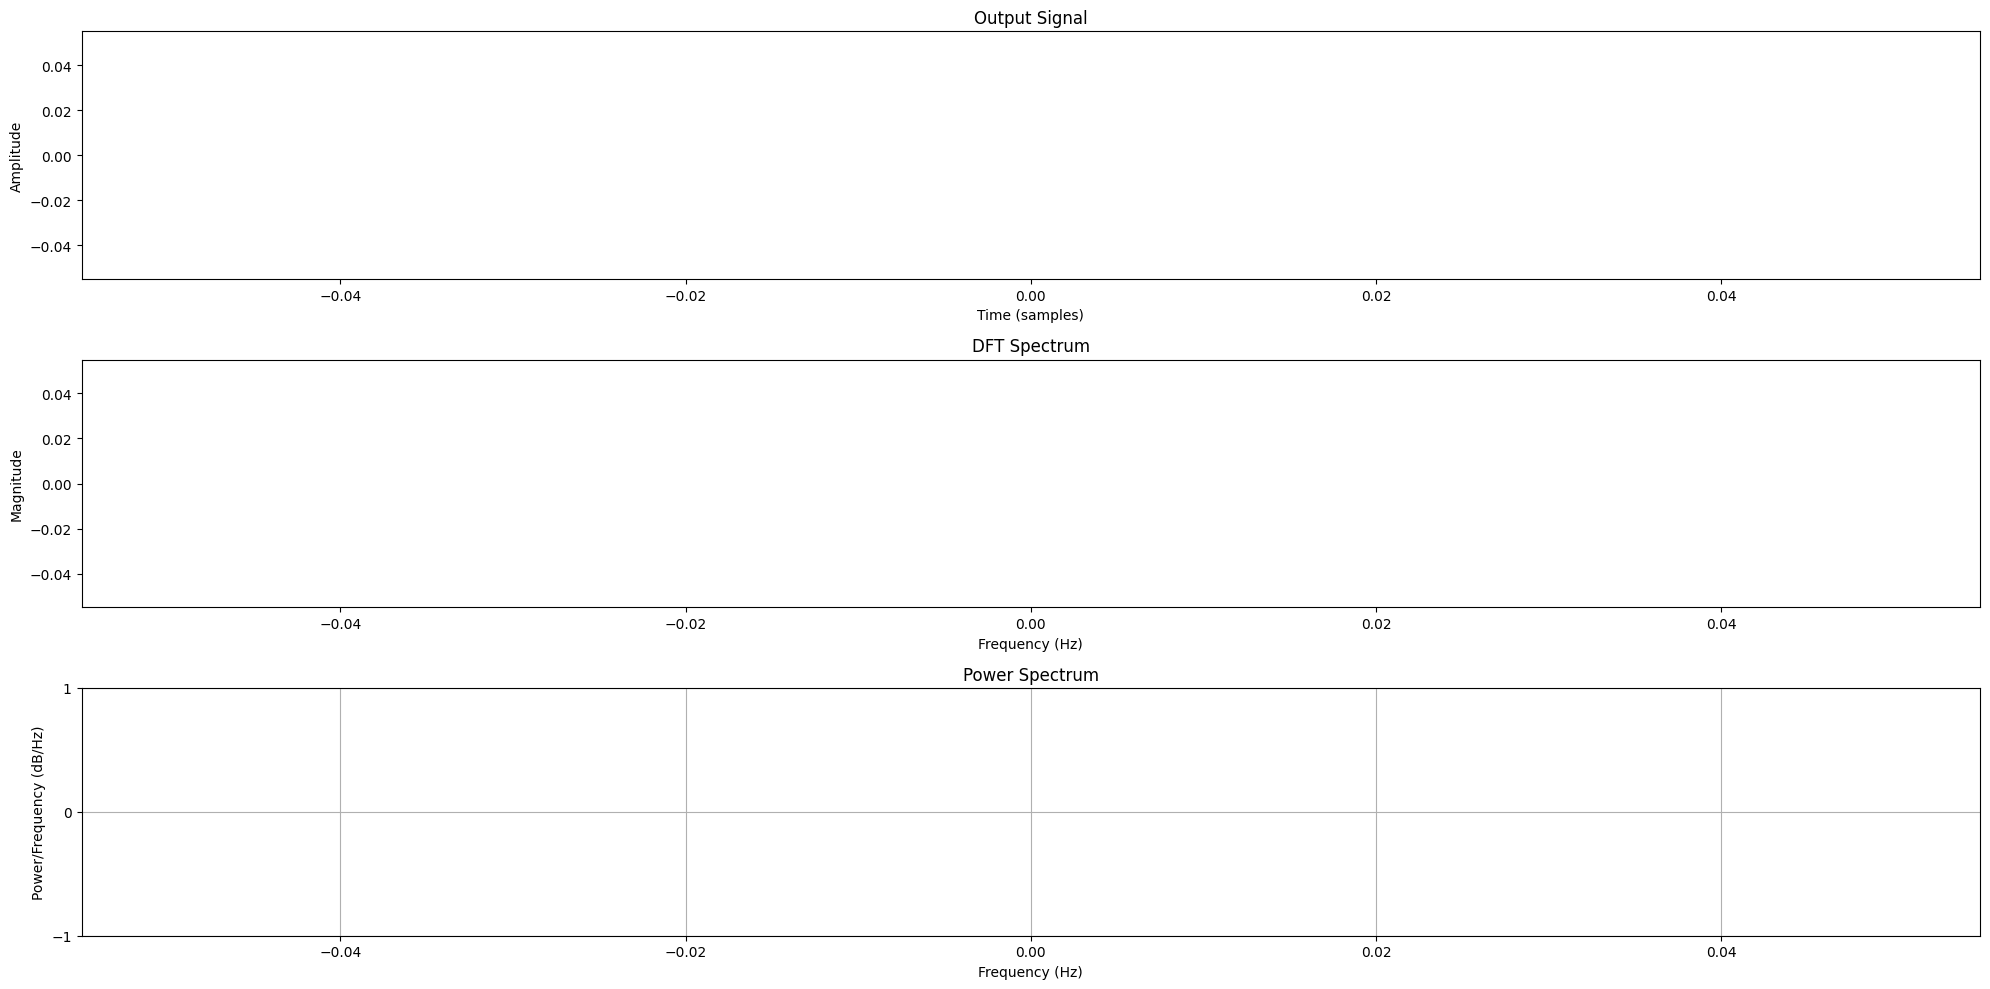

In [92]:
b,a = cheby1(cheby1_order, 1, cheby1_critical_freq, 'low', analog=True)

filtered_output = filtfilt(b, a, noise)

dft = np.fft.fft(filtered_output)
freq = np.fft.fftfreq(len(filtered_output), d=1/fs)

plot_all(filtered_output, dft, freq, fs=1000)

# Question 5

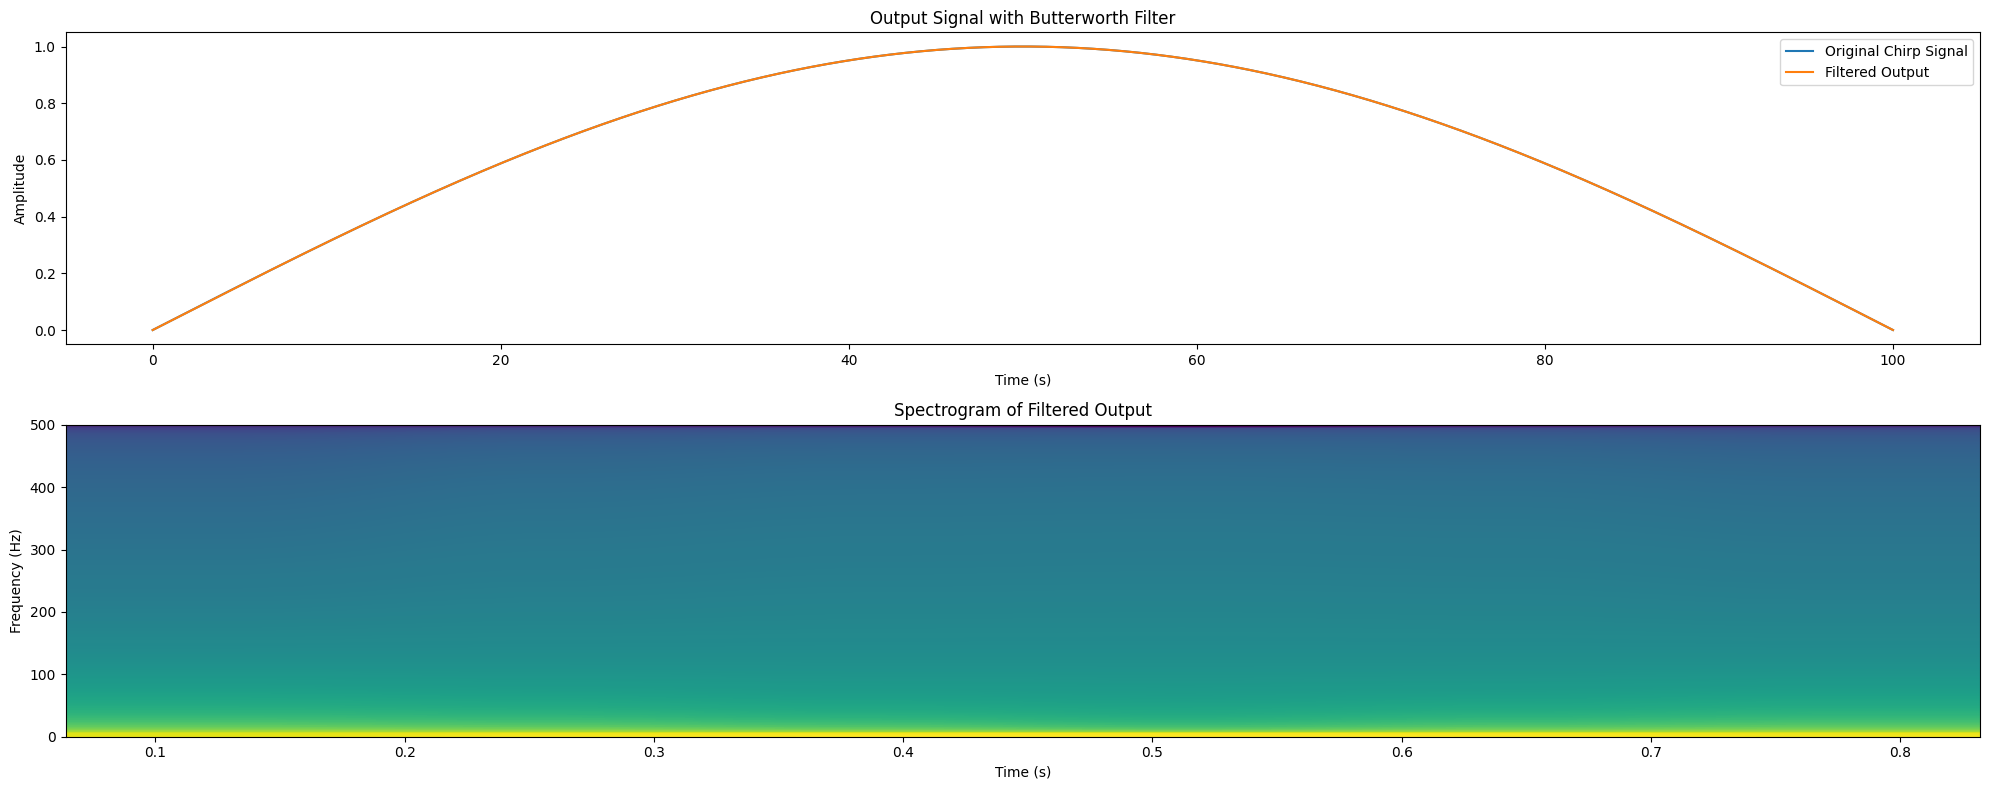

In [93]:
t = np.linspace(0, 100, 1000)
chirp_signal = np.sin(2 * np.pi * t / 200)

order = 3
fs = 1000  # Sampling frequency (Hz)
cutoff_freq = 100  # Cutoff frequency (Hz)

# Design the Butterworth filter
b, a = butter(order, cutoff_freq / (fs / 2), btype='low')

# Apply the filter to the chirp signal
filtered_output = filtfilt(b, a, chirp_signal)

# Plot the output signal
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
plt.plot(t, chirp_signal, label='Original Chirp Signal')
plt.plot(t, filtered_output, label='Filtered Output')
plt.title('Output Signal with Butterworth Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the spectrogram
plt.subplot(2, 1, 2)
plt.specgram(filtered_output, Fs=fs, NFFT=256, noverlap=128)
plt.title('Spectrogram of Filtered Output')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()